In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Example of a base curve

In [4]:
curves = pd.read_csv('data_demand_curves/curves_0.csv', header=None)

In [5]:
curves.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.259692,0.255026,0.248451,0.243996,0.238985,0.234001,0.229122,0.224721,0.220134,0.216687,...,0.343847,0.337007,0.325791,0.313701,0.302830,0.292676,0.281672,0.271120,0.261973,0.252931
1,0.243413,0.239436,0.231720,0.226630,0.221194,0.217774,0.212630,0.209157,0.206400,0.205154,...,0.396503,0.387436,0.374948,0.362062,0.349256,0.337802,0.324572,0.315106,0.303308,0.292463
2,0.281725,0.275415,0.268071,0.261522,0.256140,0.250307,0.245030,0.241504,0.238137,0.238163,...,0.389106,0.378554,0.367895,0.354161,0.341859,0.330219,0.317466,0.306304,0.293471,0.283900
3,0.275336,0.272021,0.265393,0.258155,0.252878,0.248053,0.241027,0.239144,0.236519,0.233656,...,0.368160,0.358615,0.347824,0.337192,0.326507,0.316167,0.303732,0.294213,0.284748,0.273877
4,0.263749,0.260382,0.253515,0.245481,0.238879,0.232383,0.226656,0.223156,0.218384,0.218941,...,0.342840,0.334276,0.324784,0.313409,0.303679,0.294558,0.282812,0.274169,0.265234,0.256511


In [6]:
curve = curves.values[0, :]
print(curve.shape)

(96,)


Text(0.5, 1.0, 'A basic curve in January')

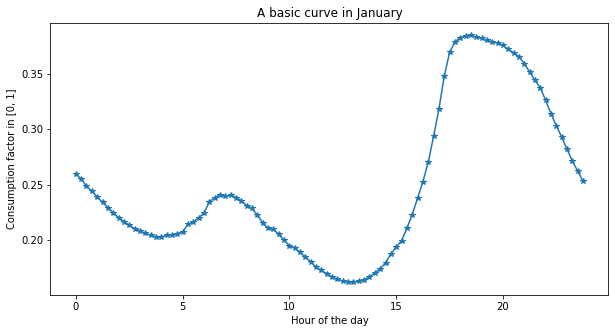

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 24 * 4) / 4, curve, marker='*')
plt.xlabel('Hour of the day')
plt.ylabel('Consumption factor in [0, 1]')
plt.title('A basic curve in January')

## Generation of a new curve for January

In [8]:
def generate_load_curve(base, scale, start=None):
    if start is None:
        new_curve = [base[0]]
    else:
        new_curve = [start]
    for i in range(1, base.size):
        diff = base[i - 1] - new_curve[-1]
        print(diff)
        noise = np.random.normal(loc=diff, scale=scale)
        p = new_curve[-1] + noise
        new_curve.append(p)
    return new_curve

In [9]:
np.random.seed(2019)
scale = 0.005
new_curve = generate_load_curve(curve, scale)

0.0
-0.0035780288050681897
-0.010682691879180944
-0.011860702504248227
-0.011670422852590484
-0.0031752620108638774
-0.008306577944809435
-0.007270093049355275
-0.006025520644267868
-0.0022686188750869474
-0.00816121385662319
0.00542555666285241
-0.00018427794811470832
-0.0024707638383984765
0.0011166602277526971
-0.002998969087858655
0.0006018840199044362
-0.011504898147751963
-0.001846764573725651
-0.0032751564805870437
0.004347158081379143
0.011418606526041042
0.001663689646737132
0.020081808064407486
-0.0013242953142232339
0.00638352837246936
0.0011821424904302769
0.0005171945131627054
-0.0036265660204337358
0.003420034119639759
0.0022325206928076324
0.0011453593354512626
-0.0020677798922410506
-0.007925842525923793
-0.007211786755413424
-0.0008286909877807946
-0.00035400492539830464
0.004174325188024214
-0.007759537793473881
-0.010515765250225018
-0.006226320714985412
0.0022049152677711126
0.0005737751260894708
0.003584152696552767
0.0019510205535311909
-0.007421740198237048
-0.00

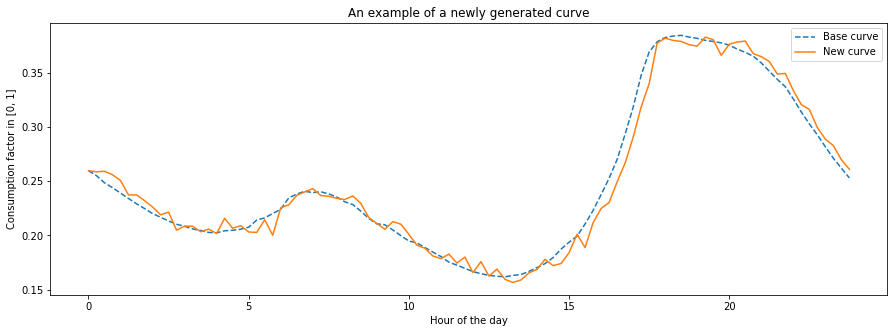

In [69]:
plt.figure(figsize=(15, 5))
t = np.arange(0, 24*4) / 4
plt.plot(t, curve, linestyle='--', label='Base curve')
plt.plot(t, new_curve, label='New curve')
plt.xlabel('Hour of the day')
plt.ylabel('Consumption factor in [0, 1]')
plt.title('An example of a newly generated curve')
plt.legend()

## Generation of 10 new curves (based on the same one) for January

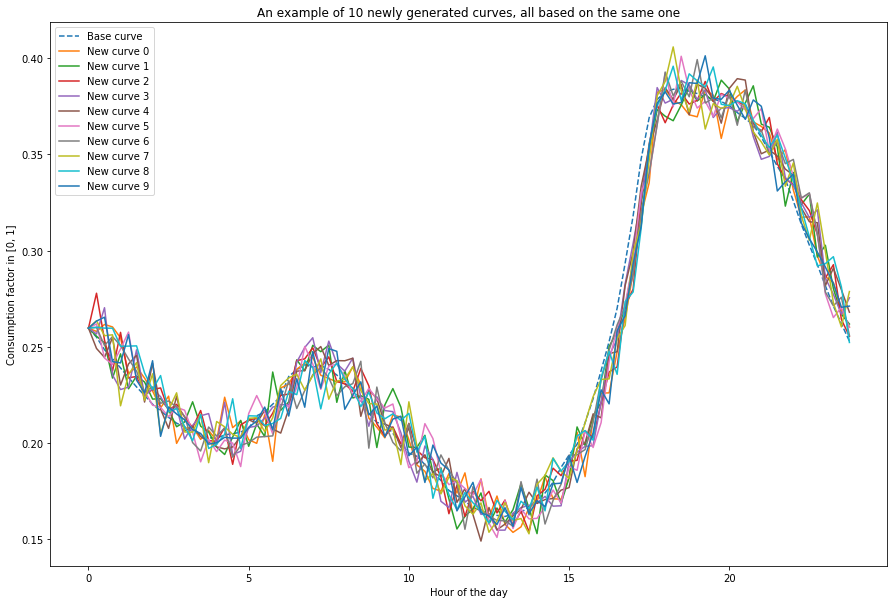

In [72]:
np.random.seed(2019)
scale = 0.008

plt.figure(figsize=(15, 10))
plt.plot(t, curve, linestyle='--', label='Base curve')
for i in range(10):
    new_curve = generate_load_curve(curve, scale)
    t = np.arange(0, 24*4) / 4
    plt.plot(t, new_curve, label=f'New curve {i}')

plt.xlabel('Hour of the day')
plt.ylabel('Consumption factor in [0, 1]')
plt.title('An example of 10 newly generated curves, all based on the same one')
plt.legend()

## Generation of 20 new curves for January

Text(0.5, 1.0, 'An example of 20 newly generated curves, each based on a random base curve from January')

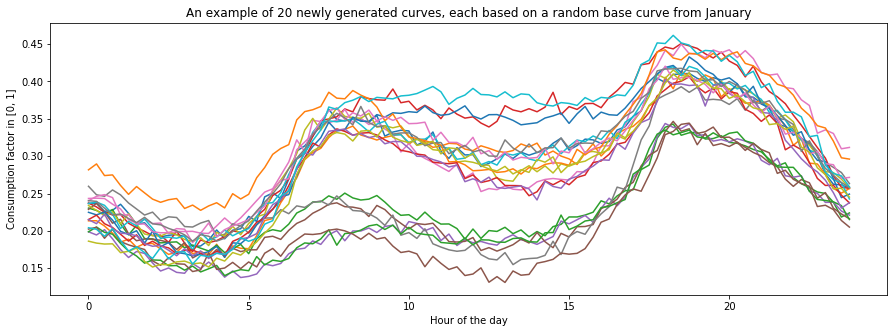

In [82]:
np.random.seed(2019)
scale = 0.006

plt.figure(figsize=(15, 5))
for i in range(20):
    base = curves.values[np.random.randint(0, 31), :]
    new_curve = generate_load_curve(base, scale)
    t = np.arange(0, 24*4) / 4
    plt.plot(t, new_curve, label=f'New curve {i}')

plt.xlabel('Hour of the day')
plt.ylabel('Consumption factor in [0, 1]')
plt.title('An example of 20 newly generated curves, each based on a random base curve from January')
#plt.legend()

## Generation of new curves for different months

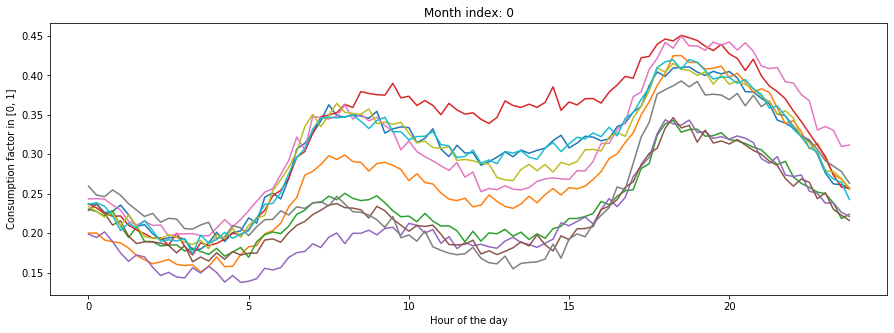

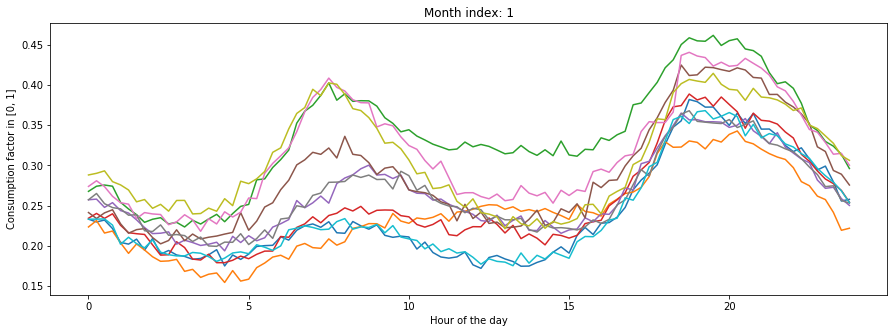

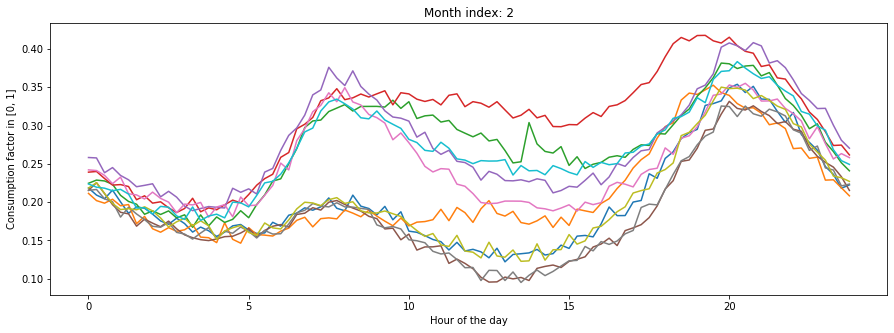

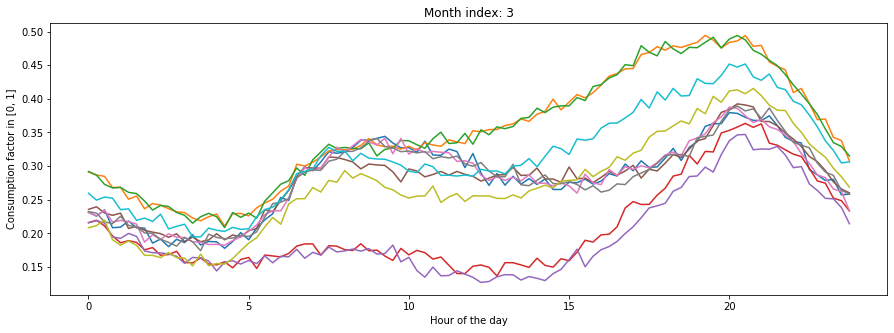

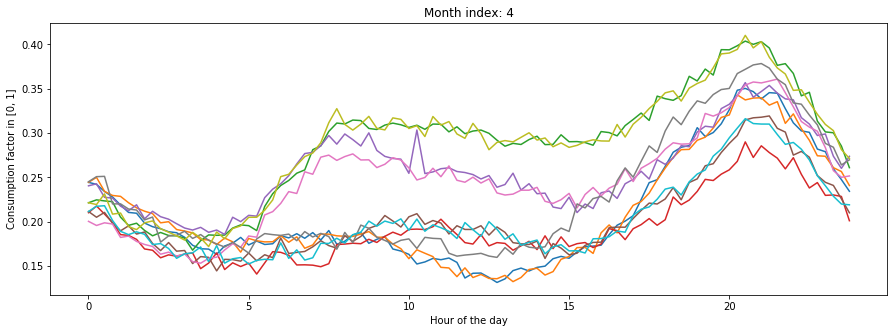

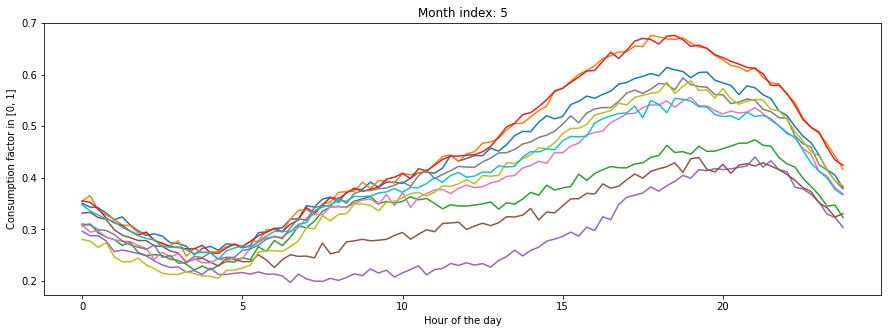

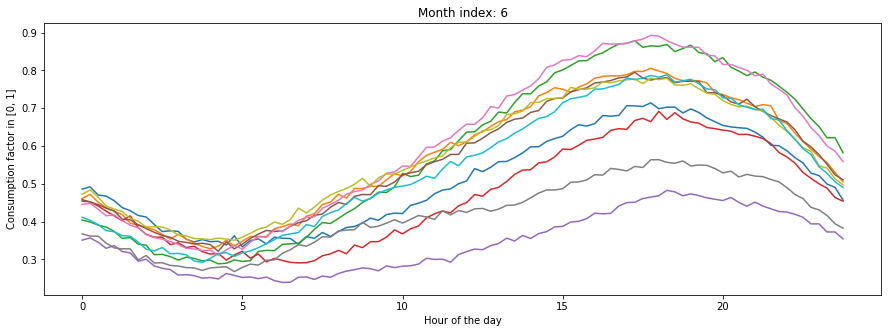

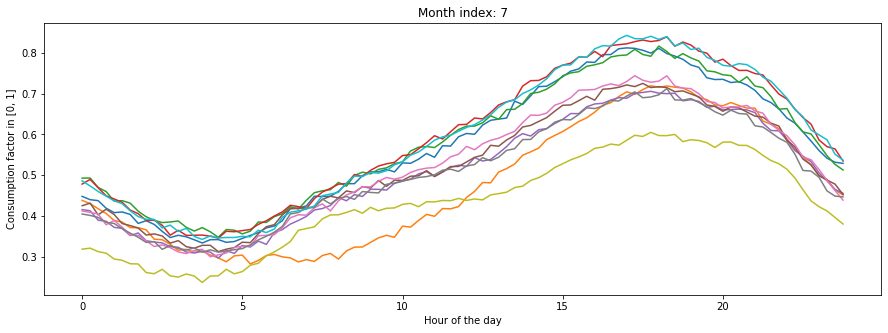

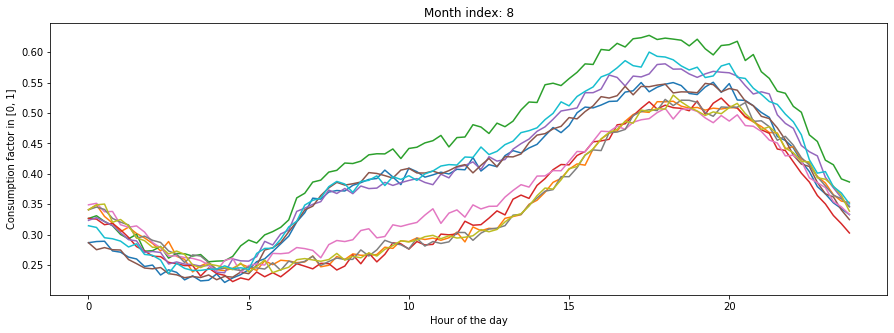

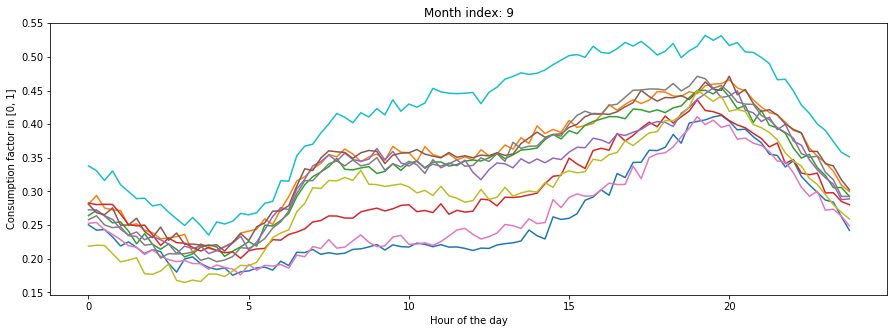

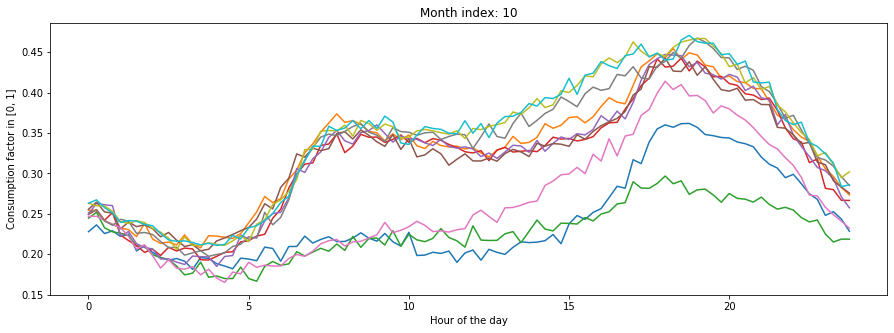

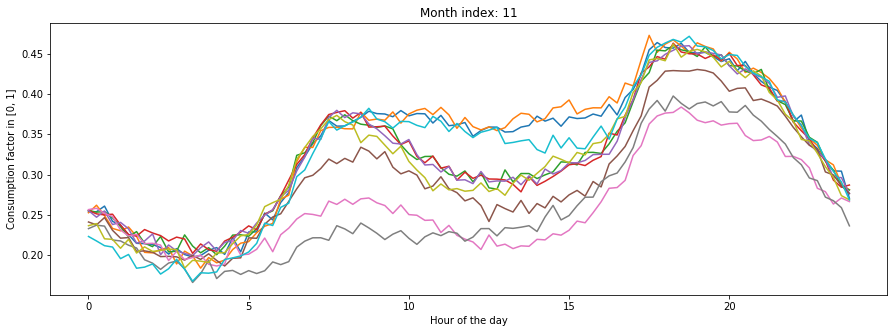

In [105]:
np.random.seed(2019)
scale = 0.006
t = np.arange(0, 24*4) / 4

for month in range(12):
    plt.figure(figsize=(15, 5))
    curves = pd.read_csv(f'data_demand_curves/curves_{month}.csv', header=None)
    for i in range(10):
        rand_date = np.random.randint(0, 28)
        curve = curves.values[rand_date, :]
        new_curve = generate_load_curve(curve, scale)
        plt.plot(t, new_curve)
    
    plt.xlabel('Hour of the day')
    plt.ylabel('Consumption factor in [0, 1]')
    plt.title(f'Month index: {month}')

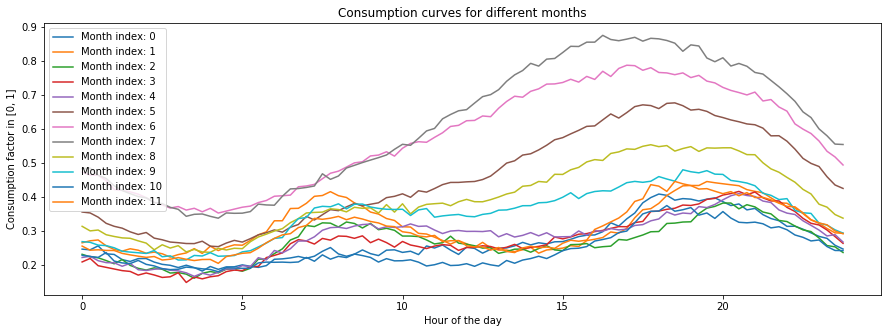

In [112]:
#np.random.seed(2019)
scale = 0.006
t = np.arange(0, 24*4) / 4

plt.figure(figsize=(15, 5))
for month in range(12):
    curves = pd.read_csv(f'data_demand_curves/curves_{month}.csv', header=None)
    for i in range(1):
        rand_date = np.random.randint(0, 28)
        curve = curves.values[rand_date, :]
        new_curve = generate_load_curve(curve, scale)
        plt.plot(t, new_curve, label=f'Month index: {month}')
    
    plt.xlabel('Hour of the day')
    plt.ylabel('Consumption factor in [0, 1]')
    plt.title(f'Consumption curves for different months')
    plt.legend()

## Generate a consumption curve for a week in January and July

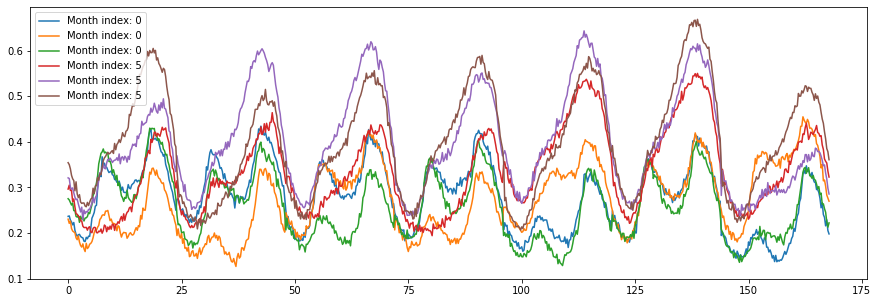

In [127]:
#np.random.seed(2019)
scale = 0.006
days = 7
n_per_month = 3
t = np.arange(0, 24*4*days) / 4
colors = ['b', 'r']

plt.figure(figsize=(15, 5))

for j, month in enumerate([0, 5]):
    curves = pd.read_csv(f'data_demand_curves/curves_{month}.csv', header=None)
    color = colors[j]
    
    for _ in range(n_per_month):
    
        new_curve = []

        for i in range(days):
            rand_date = np.random.randint(0, 28)
            curve = curves.values[rand_date, :]

            if not new_curve:
                next_day = generate_load_curve(curve, scale)
            else:
                next_day = generate_load_curve(curve, scale, curve[-1])

            new_curve += next_day


        plt.plot(t, new_curve, label=f'Month index: {month}')

plt.legend()

### Display examples using the LoadGenerator class

In [6]:
import sys
sys.path.append('..')
import load_scenarios

ModuleNotFoundError: No module named 'gym_smartgrid'